# House Price & Image EDA
This notebook explores the combined California Housing tabular data and CubiCasa5k images.

In [3]:
%pip install matplotlib seaborn opencv-python

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 9.5 MB/s eta 0:00:00m eta 0:00:010:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 7.4 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.1 MB/s eta 0:00:0010.0 MB/s eta 0:00:01
Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 9.7 MB/s eta 0:00:0010.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 11.0 MB/s eta

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image


# Load the dataset generated by data_prep.py
df = pd.read_csv('data/dataset.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (20640, 13)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms,sq_ft,image_path
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.023810,176000.0,data/cubicasa/cubicasa5k/cubicasa5k/high_quali...
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.971880,1419800.0,data/cubicasa/cubicasa5k/cubicasa5k/high_quali...
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.073446,293400.0,data/cubicasa/cubicasa5k/cubicasa5k/high_quali...
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.073059,254800.0,data/cubicasa/cubicasa5k/cubicasa5k/high_quali...
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.081081,325400.0,data/cubicasa/cubicasa5k/cubicasa5k/high_quali...


--- Missing Values ---
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
bedrooms              207
sq_ft                   0
image_path              0
dtype: int64


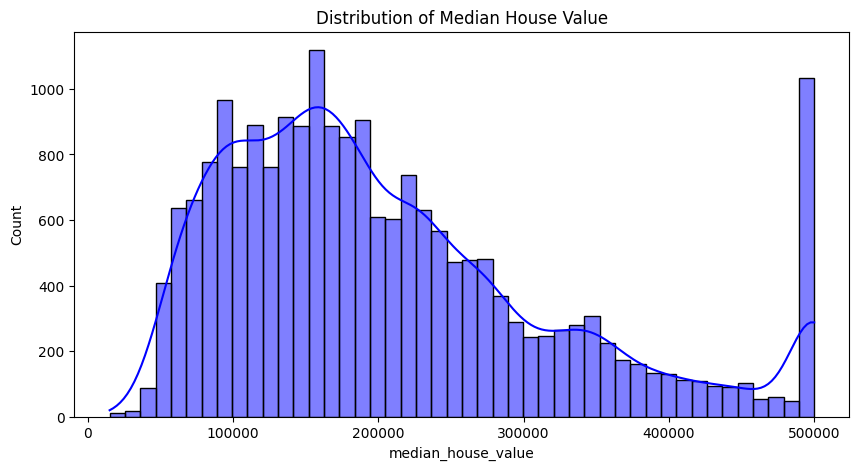

In [5]:
# Tabular EDA
print("--- Missing Values ---")
print(df.isnull().sum())

df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

plt.figure(figsize=(10, 5))
sns.histplot(df['median_house_value'], kde=True, color='blue')
plt.title('Distribution of Median House Value')
plt.show()

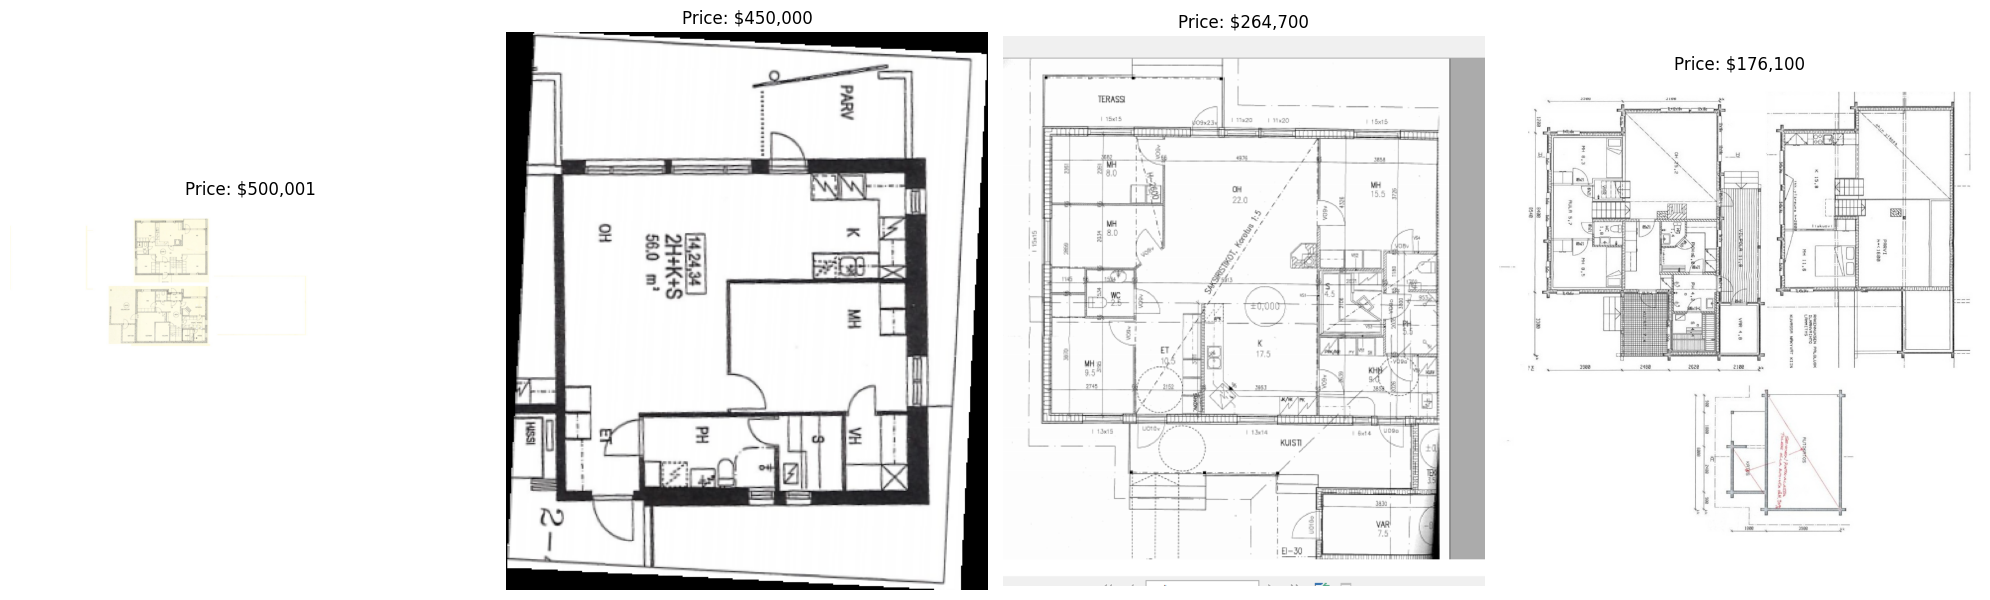

In [6]:
# Image Visualization
sample_df = df[df['image_path'] != 'no_image_found'].sample(min(4, len(df)))

fig, axes = plt.subplots(1, len(sample_df), figsize=(20, 10))
if len(sample_df) == 1: axes = [axes]

for i, (idx, row) in enumerate(sample_df.iterrows()):
    img = cv2.imread(row['image_path'])
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].set_title(f"Price: ${row['median_house_value']:,.0f}")
        axes[i].axis('off')

plt.tight_layout()
plt.show()